# Text EDA

## Imports

In [1]:
import pickle
import seaborn
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter

from helper import *



## Load Data

In [2]:
!ls ../data/raw

e_hl4.pkl  iprover_hl4.pkl  proof_data.zip
e_jjt.pkl  iprover_jjt.pkl  vampire_jjt.pkl


In [3]:
#data_path = '../data/axioms_iprover_hl4.pkl'
#data_path = '../data/axioms_e_hl4.pkl'

data_path = '../data/raw/vampire_jjt.pkl'
#data_path = '../data/axioms_e_jjt.pkl'




#data_path = '../data/axioms_iprover_jjt.pkl'
#data_path = "../axioms_e_hl4.pkl"

#data_path = "/home/eholden/PycharmProjects/image_caption/descriptions.txt"


In [4]:

if ".pkl" in data_path:

    with open(data_path, 'rb') as f:
        data = pickle.load(f)
else:
    with open(data_path, 'rb') as f:
        desc = f.readlines()

    data = {}
    for i in range(len(desc)):
        # Convert to string and remove trailign newline
        desc[i] = desc[i].decode("utf-8")[:-1]
        k, *v = desc[i].split()
        data[k] = v

## Extract the proof data from FOF problems only

In [5]:
axioms = {}
for d in data.keys():
    if '+' in data[d]['version']:
        axioms[d] = data[d]['axioms']
        
print('Number of FOF proofs: ', len(axioms)) 

Number of FOF proofs:  3369


## Axiom Stats

Removing problems with no axioms
Number of proofs with axioms  3360

Total number of axioms:  17285
Number of unique axioms:  12853

Examples of extracted axioms
  ! [X4] : aa_a_set_a(set_single_a,X4) = aa_set_a_set_a(insert_a(X4),bot_bot_set_a)),
  bot_bot_set_a = set_a(nil_a)),
  ! [X7,X8] : set_a(cons_a(X7,X8)) = aa_set_a_set_a(insert_a(X7),set_a(X8))),
  ! [X3,X4] : aa_list_a_set_a(set_a,aa_list_a_list_a(aa_a_f3048006285668266245list_a(cons_a,X3),X4)) = aa_set_a_set_a(aa_a_fun_set_a_set_a(insert_a,X3),aa_list_a_set_a(set_a,X4))),
  insert_a = set_without_insert_a),

Max number of axioms:  99
Min number of axioms:  1
Avg number of axioms: 5.14

Number of problems with zero axioms:  0


<AxesSubplot:ylabel='Count'>

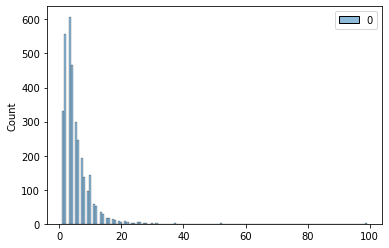

In [6]:

print("Removing problems with no axioms")
for key in list(axioms.keys()):
    if len(axioms[key]) < 1:
        del axioms[key]

print("Number of proofs with axioms ", len(axioms))
print()

all_axioms = []
for k, axiom_list in axioms.items():
    for ax in axiom_list:
        all_axioms.append(ax)

print("Total number of axioms: ", len(all_axioms))
print("Number of unique axioms: ", len(set(all_axioms)))
print()
print("Examples of extracted axioms")
for ax in all_axioms[0:5]:
    print(ax)
print()

# General stats
axiom_count = {prob: len(axiom_list) for prob, axiom_list in axioms.items()}
print("Max number of axioms: ", max(v for v in axiom_count.values()))
print("Min number of axioms: ", min(v for v in axiom_count.values()))
print("Avg number of axioms: {0:.2f}".format(sum(v for v in axiom_count.values()) / len(axioms)))

print()
print("Number of problems with zero axioms: ", sum(1 for v in axiom_count.values() if v == 0))

# Plot the distribution of axioms
seaborn.histplot(axiom_count.values())

# Top 15 axioms

In [7]:
all_text = []
for sentence in axioms.values():
    all_text += sentence

for ax, occ in Counter(all_text).most_common(15):
    print(occ, ax)
    print()
del all_text

284   pp(fTrue)),

272   ~pp(fFalse)),

124   ! [X0,X1] : gg_bool(aa_nat_bool(X0,X1))),

77   ! [X3] : (gg_bool(X3) => (fFalse = X3 | fTrue = X3))),

72   h = h_a),

70   ! [X4] : (gg_bool(X4) => (fFalse = X4 | fTrue = X4))),

66   size_s1514170348903157724r_addr = predic3275540705076634676r_addr),

56   gg_option_addr(xcpa)),

39   gg_bool(spurious_wakeups)),

31   ! [X0,X1] : gg_bool(aa_exp176724386283871451r_bool(X0,X1))),

30   wf_jvm_prog_phi_addr(phi,p)),

24   gg_option_addr(none_addr)),

23   pp(aa_set_a_bool(aa_a_fun_set_a_bool(member_a,x),a2))),

22   gg_a(t)),

22   none_addr = xcpa),



## Compute dictionary and tokenize the axioms

In [8]:
ax_to_id = {}
id_to_ax = {}
count = 0
for ax in sorted(set(all_axioms)):
    if ax not in ax_to_id:
        ax_to_id[ax] = count
        id_to_ax[count] = ax
        count +=1

assert len(ax_to_id) == len(id_to_ax)
print("Dict size: ", len(ax_to_id))

print("Remove proofs with no axioms and tokenize")
text = []
for problem, proof in axioms.items():
    if len(proof) == 0:
        continue

    # Tokenize
    axiom_sentence = ' '.join([str(ax_to_id[p]) for p in proof])
    text.append(axiom_sentence)

Dict size:  12853
Remove proofs with no axioms and tokenize


In [9]:
# TODO check if there is anything left after pruning?

# Investigate the frequency of the axioms in the proofs

In [41]:
set(t.split())

{'5672', '7126', '8683'}

In [33]:
text

['5672 8683 7126',
 '3932 9357',
 '7887 7889 1594',
 '9088 1749 9524',
 '7481 9524',
 '9022 7675 7766',
 '9031 7767 30 7762 17 7761 4109',
 '9020 7765 31 7763 10 7760 3363',
 '115 5 2430 9352 323 6 40 312 8816 3390 311 143 258 9185 5628 9184',
 '8815 9131 184 5533 2801 9132',
 '6707 9525 5944 123 7781 4608 6086 7754 4539 6085 4540 735 738 736 5975 737 739 5976',
 '6332 2253',
 '6446 127 6533 6552 6567 6547 6569 4754 11970 3891',
 '3953 5495 5501 5499 5500 5496',
 '7067 10594 10842',
 '7721 9120 7727 9114 6666 7722 7728 6665 10595 7123 1823 9059',
 '865 3729 864 10843',
 '2309',
 '1720 9217 420 2434 2501 11512',
 '5707',
 '9150 7820 7821 9219 4704 2126 3527 7823 11194',
 '4793',
 '9150 300 301 9219 4704 2126 3527 303 11193',
 '5147 3549 552 11130 554 6493 11107',
 '2246 2247 10803 6401 2308 2307 1976 9150',
 '12808 9219 6340 11524',
 '4811 208 364 1476 12124 12534 11109',
 '9347 2164 10823',
 '9150 2553 9219 2554 9220 12018 136',
 '551 721 1442 7207 11513 3103 5801',
 '12802 11372',
 '8

In [34]:
tfidf = TfidfVectorizer()
tfidf.fit(['hello', 'foo'])

TfidfVectorizer()

In [37]:
set(tfidf.vocabulary_.keys())

{'foo', 'hello'}

In [44]:
document_frequency = [1, 2, 4, 8, 10,  int(len(text) * 0.01), int(len(text) * 0.05), int(len(text) * 0.1)]
for df in document_frequency:
    tfidf = TfidfVectorizer(min_df=df)
    try:
        tfidf.fit_transform(text)
        no_axioms = len(tfidf.vocabulary_)
        
        # Compute the number of problems which will not contain any oov tokens under this constraint
        count = 0
        for t in text:
            if len(set(t.split())) == len(set(t.split()).intersection(set(tfidf.vocabulary_.keys()))):
                count += 1
    #print("oov frequency: ", count / len(text))
    except ValueError:
        no_axioms = 0
        count =0
        
    print("Number of axioms occuring in at least {1} proof(s): {0}".format(no_axioms, df))
    print("Portion of unmodified sentences: ", count / len(text))
    print()
        

Number of axioms occuring in at least 1 proof(s): 12843
Portion of unmodified sentences:  0.9946428571428572

Number of axioms occuring in at least 2 proof(s): 1601
Portion of unmodified sentences:  0.09672619047619048

Number of axioms occuring in at least 4 proof(s): 316
Portion of unmodified sentences:  0.019345238095238096

Number of axioms occuring in at least 8 proof(s): 85
Portion of unmodified sentences:  0.002380952380952381

Number of axioms occuring in at least 10 proof(s): 55
Portion of unmodified sentences:  0.00029761904761904765

Number of axioms occuring in at least 33 proof(s): 9
Portion of unmodified sentences:  0.0

Number of axioms occuring in at least 168 proof(s): 2
Portion of unmodified sentences:  0.0

Number of axioms occuring in at least 336 proof(s): 0
Portion of unmodified sentences:  0.0



# Include axioms that are used in at least two proofs

In [11]:
print("Computing Tf-IDF features with axioms occuring in at least 2 proofs")
tfidf = TfidfVectorizer(min_df=2)
feat = tfidf.fit_transform(text)

# Compute number of problems with no features
oov_count = 0
for f in feat.toarray():
    #print(f)
    if sum(f) == 0:
        oov_count += 1
print("Number of problems with all out of dict features: ", oov_count)

Computing Tf-IDF features with axioms occuring in at least 2 proofs
Number of problems with all out of dict features:  1163


# Plot the vectors to see their sparsity

<AxesSubplot:>

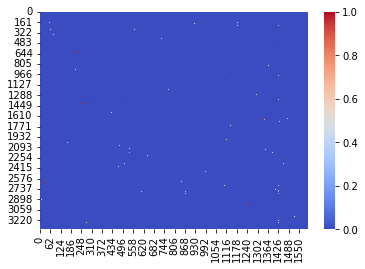

In [12]:
sns.heatmap(feat.toarray(), cmap="coolwarm")

# Cluster the proofs based on their axiom data

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Set optimal number of clusters as:  26


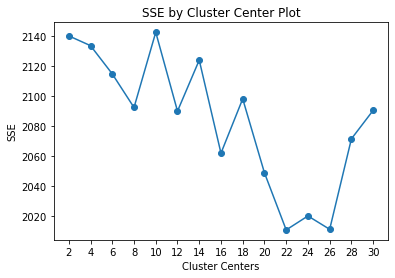

In [13]:
find_optimal_clusters(feat, 30)
no_clusters = 26
print("Set optimal number of clusters as: ", no_clusters)

In [14]:
clusters = MiniBatchKMeans(n_clusters=no_clusters, init_size=1024, batch_size=2048, random_state=20).fit_predict(feat)
print("Number of problems per cluster: ", Counter(clusters))

Number of problems per cluster:  Counter({1: 2900, 15: 141, 13: 91, 9: 56, 12: 31, 25: 21, 11: 20, 20: 19, 8: 16, 5: 9, 17: 9, 6: 8, 16: 6, 21: 6, 2: 5, 7: 3, 22: 3, 4: 2, 3: 2, 24: 2, 14: 2, 18: 2, 10: 2, 23: 2, 19: 1, 0: 1})


# Plot the PC/T-SNE representation of the lcusters with the KMeans labels

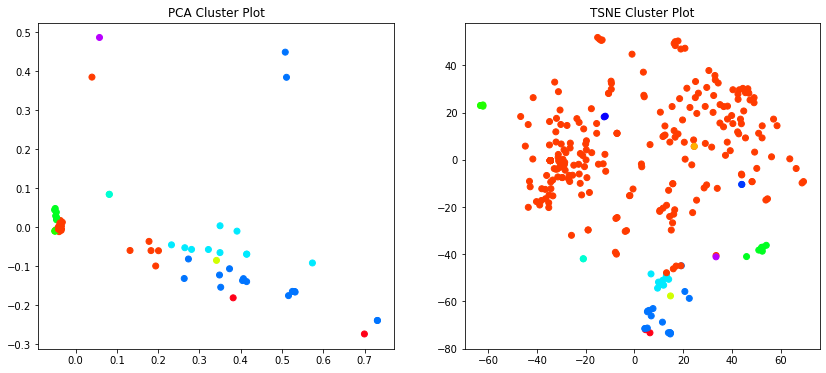

In [15]:
plot_tsne_pca(feat, clusters)

# Show the most common axioms in each cluster

In [16]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()

    for i,r in df.iterrows():
        print('\n## Cluster {}'.format(i))
        print('\n'.join(sorted([id_to_ax[t] for t in np.argsort(r)[-n_terms:]])))

get_top_keywords(feat, clusters, tfidf.get_feature_names(), 5)



## Cluster 0
  ! [X11,X12] : (pp(aa_act448767440739677879b_bool(aa_act684511984874093086b_bool(jMM_sim_action_c_b,X11),X12)) => (pp(aa_act448767440739677879b_bool(jMM_is6517164791982678802on_c_b,X11)) <=> pp(aa_act448767440739677879b_bool(jMM_is6517164791982678802on_c_b,X12))))),
  ! [X11,X12] : (pp(aa_pro3807386076377629118r_bool(wf_pro6023597092083776535M_addr(X11),X12)) => wf_sys7595191629826360066M_addr(X12))),
  ! [X11,X12] : pp(aa_Pro2553244091554596311b_bool(jVMExe8812188439662146715_a_b_c(X11),aa_Pro8213239261997478711nt_a_b(jVMExe6861275092923623515_a_b_c(X11),X12)))),
  ! [X14,X15,X16] : heap_s1620459207779391136d_heap(X14,X15,X16) = aa_addr_thread_id(X14,hd_addr(heap_s2353177641128705194p_addr(X15,X16)))),
  ! [X16,X22,X6,X5] : (aa_nat_nat(aa_nat_fun_nat_nat(plus_plus_nat,X22),X6) = X16 => aa_nat_nat(aa_nat_fun_nat_nat(plus_plus_nat,X22),aa_nat_nat(aa_nat_fun_nat_nat(plus_plus_nat,X5),X6)) = aa_nat_nat(aa_nat_fun_nat_nat(plus_plus_nat,X5),X16))),

## Cluster 1
  ! [X0,X1] :